<a href="https://colab.research.google.com/github/nath229/My-first-Github-project-with-Eckovation/blob/master/Car_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic: Car Sales Purchase Prediction

# ▪ Importing necessary libraries

In [60]:
import numpy as np
import pandas as pd


#loading data

In [61]:
data = pd.read_csv('/content/Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [62]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [63]:
data = data.rename(columns = {'Car Purchase Amount':'target'})

In [64]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,target
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


#▪ Visualize Data

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import warnings
warnings.filterwarnings('ignore')

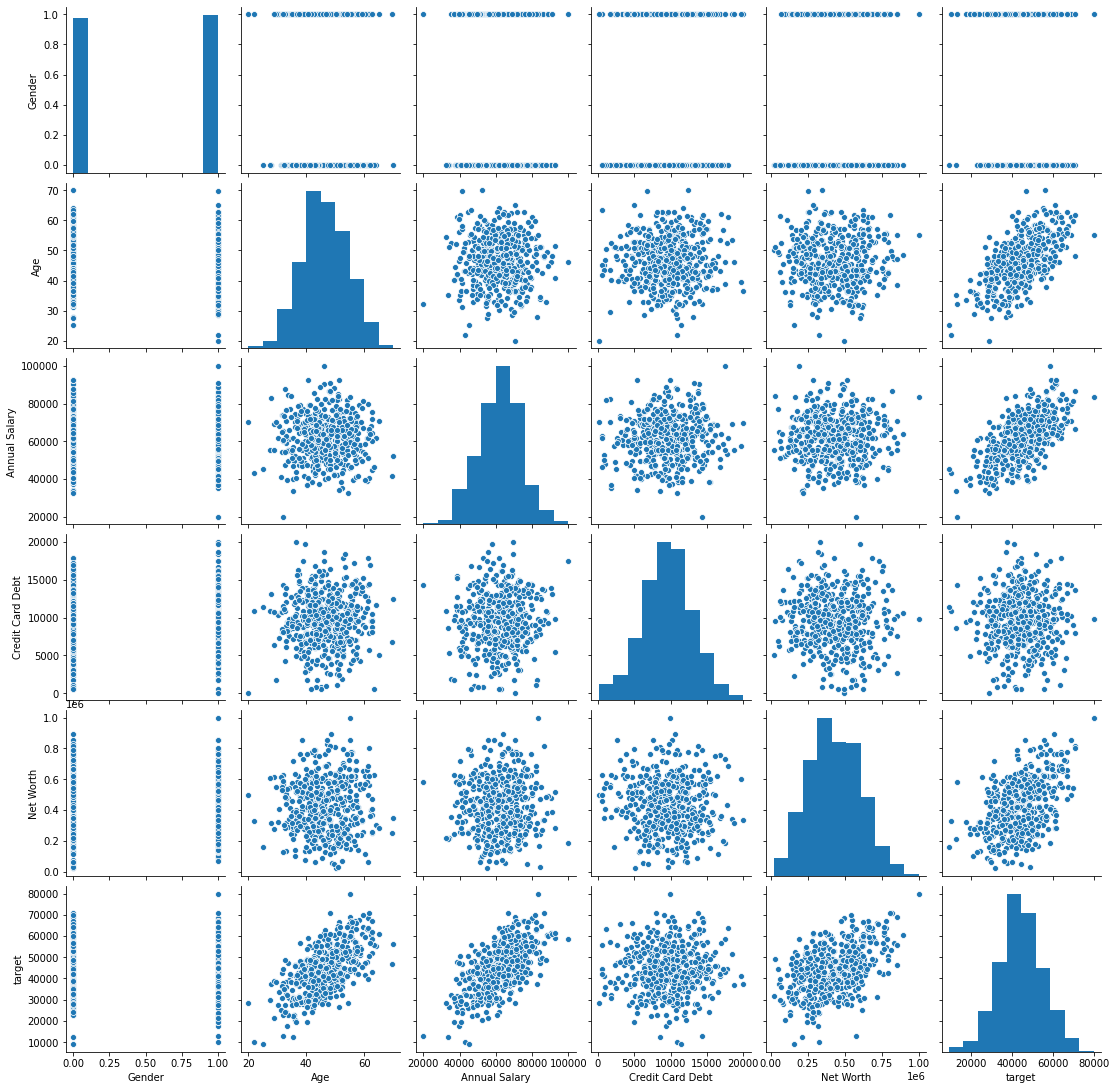

In [67]:
sns.pairplot(data)

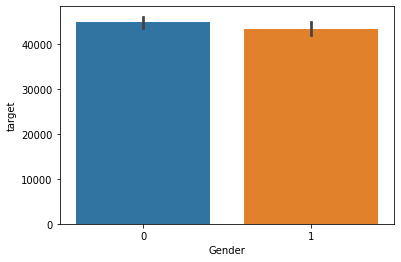

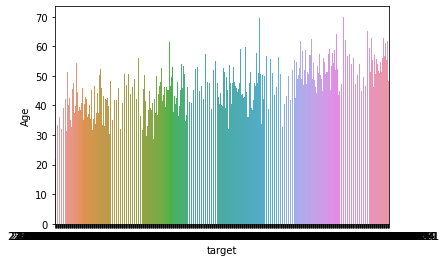

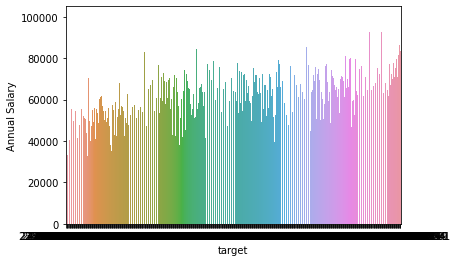

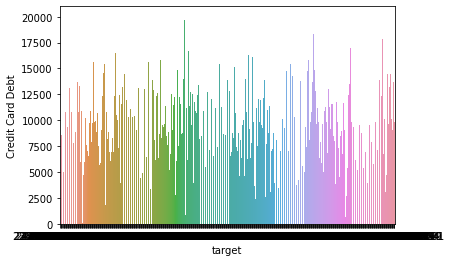

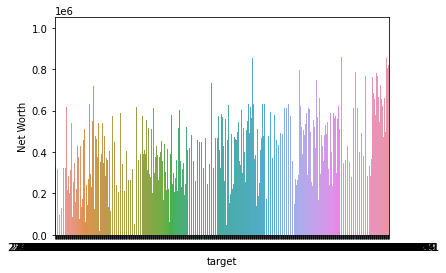

In [68]:
sns.barplot(data.iloc[:,3],data['target'])
plt.show()
for i in range(4,8):
    sns.barplot(data['target'],data.iloc[:,i])
    plt.show()

Text(0.5, 1.0, 'Net Worth boxplot')

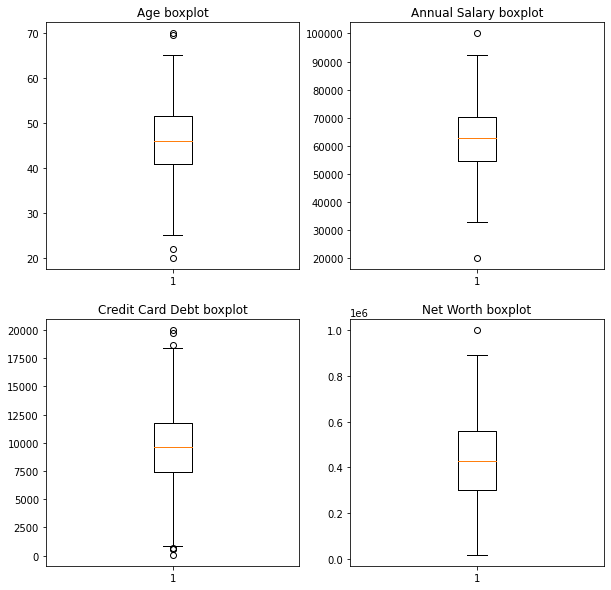

In [69]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2= fig.add_subplot(222)
ax3= fig.add_subplot(223)
ax4= fig.add_subplot(224)


ax1.boxplot('Age',data = data)
ax1.set_title('Age boxplot')
ax2.boxplot('Annual Salary',data = data)
ax2.set_title('Annual Salary boxplot')
ax3.boxplot('Credit Card Debt',data = data)
ax3.set_title('Credit Card Debt boxplot')
ax4.boxplot('Net Worth',data = data)
ax4.set_title('Net Worth boxplot')

#Data cleaning

In [70]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer Name     500 non-null    object 
 1   Customer e-mail   500 non-null    object 
 2   Country           500 non-null    object 
 3   Gender            500 non-null    int64  
 4   Age               500 non-null    float64
 5   Annual Salary     500 non-null    float64
 6   Credit Card Debt  500 non-null    float64
 7   Net Worth         500 non-null    float64
 8   target            500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [72]:
data.isnull().all()

Customer Name       False
Customer e-mail     False
Country             False
Gender              False
Age                 False
Annual Salary       False
Credit Card Debt    False
Net Worth           False
target              False
dtype: bool

In [73]:
corr= data.corr()

#Correlation heatmap

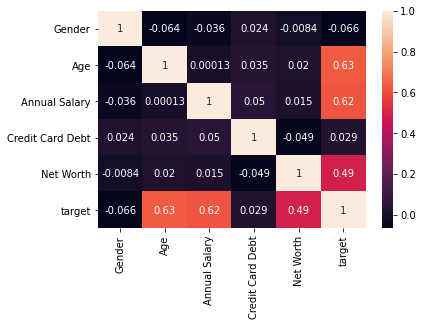

In [74]:
sns.heatmap(corr,annot=True)

Discarding the less correlated features

In [75]:
 data = data.drop(columns=['Customer Name', 'Customer e-mail', 'Country','Gender','Credit Card Debt'])

In [76]:
data.columns

Index(['Age', 'Annual Salary', 'Net Worth', 'target'], dtype='object')

In [ ]:
sns.lmplot(data['Annual Salary'],data['target'],data=data)
plt.xlabel('Annual Salary')
plt.ylabel('target')
plt.title('Annual Salary vs target');

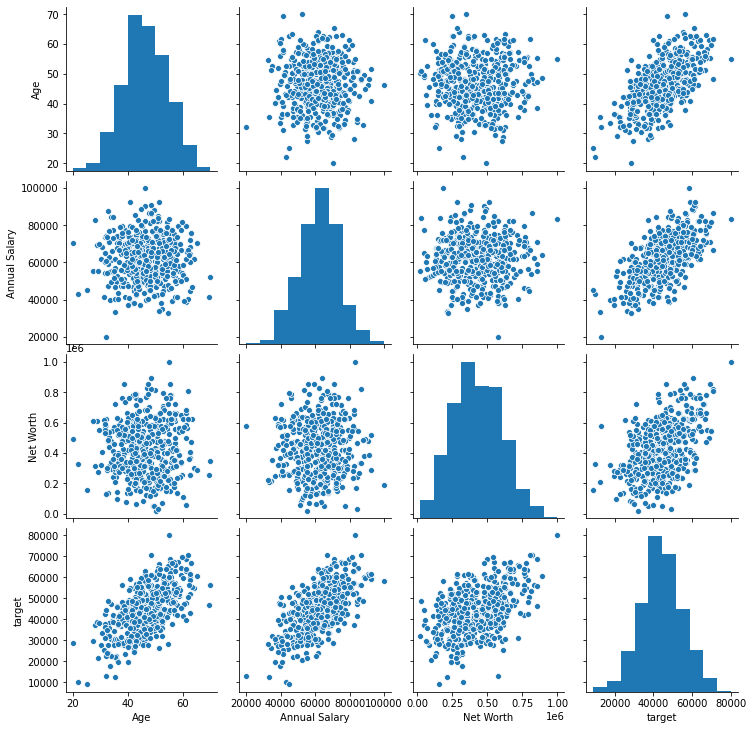

In [41]:
sns.pairplot(data,palette='colorblind')

#Normalize the dataset

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
stddata = sc.fit_transform(data)

In [45]:
X = stddata[:,0:3]
y = data['target']

In [47]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: target, Length: 500, dtype: float64

#Splits the dataset

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

# Training the Model

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()

In [52]:
model = lm.fit(X_train,y_train)

prediction accuracy score

In [53]:
model.score(X_test,y_test)

0.9999999792362265

pred value is pretty much high

In [54]:
pred = model.predict(X_test)

In [56]:
y_test.head()

69     49392.88970
29     43994.35972
471    48052.65091
344    35659.12237
54     31978.97990
Name: target, dtype: float64

In [57]:
pred[0:5]

array([49391.86460347, 43991.94406113, 48052.92451719, 35660.06008582,
       31979.58814842])

In [ ]:
sns.scatterplot()